In [597]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
pd.set_option("display.float.format",lambda x: "%.4f"%x)
pd.set_option("display.width",500)

In [598]:
df = pd.read_csv("data/diabetes.csv")

In [599]:
def check_dataframe(df,head = 5):
    print("################### Head ###################\n")
    print(df.head(head))
    print("\n################### Tail ###################\n")
    print(df.tail(head))
    print("\n################### Info ###################\n")
    df.info()
    print("\n################### Shape ###################\n")
    print(df.shape)
    print("\n################### Columns ###################\n")
    print(df.columns)
    print("\n################### Describe ###################\n")
    print(df.describe().T)
    print("\n################### NaN Values ###################\n")
    print(df.isnull().sum())

In [600]:
check_dataframe(df)

################### Head ###################

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1

################### Tail ###################

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63        0
764            

# Target Values = Outcome

# Cat Columns, Num Columns, Car Columns

In [601]:
def grab_columns(df, cat_th = 10, car_th = 20):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if
                   df[col].nunique() < cat_th and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > car_th and df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [602]:
cat_cols, num_cols, cat_but_car = grab_columns(df)

In [603]:
cat_columns

['NEW_AGE_CAT', 'AGE_BMI_CAT', 'OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']

In [604]:
cat_but_car

[]

In [605]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Num Columns Analysis

count   768.0000
mean      3.8451
std       3.3696
min       0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
max      17.0000
Name: Pregnancies, dtype: float64


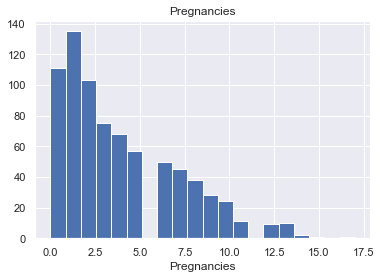

count   768.0000
mean    120.8945
std      31.9726
min       0.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
max     199.0000
Name: Glucose, dtype: float64


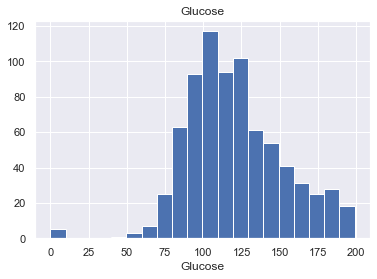

count   768.0000
mean     69.1055
std      19.3558
min       0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
max     122.0000
Name: BloodPressure, dtype: float64


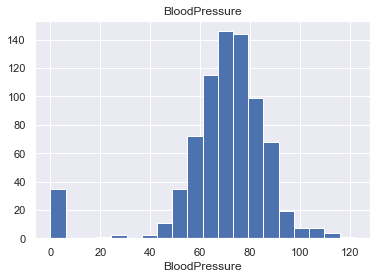

count   768.0000
mean     20.5365
std      15.9522
min       0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
max      99.0000
Name: SkinThickness, dtype: float64


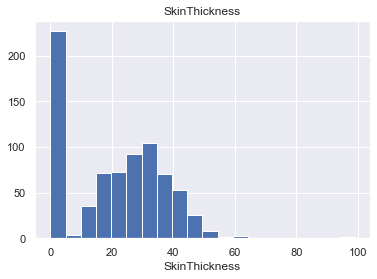

count   768.0000
mean     79.7995
std     115.2440
min       0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
max     846.0000
Name: Insulin, dtype: float64


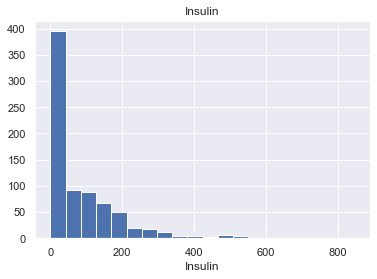

count   768.0000
mean     31.9926
std       7.8842
min       0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
max      67.1000
Name: BMI, dtype: float64


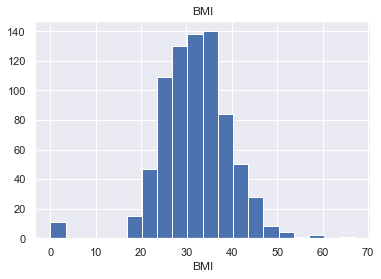

count   768.0000
mean      0.4719
std       0.3313
min       0.0780
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


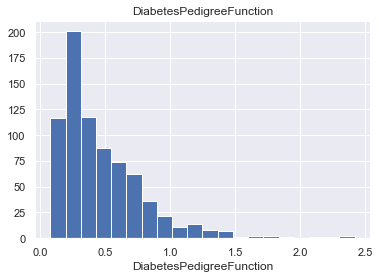

count   768.0000
mean     33.2409
std      11.7602
min      21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
max      81.0000
Name: Age, dtype: float64


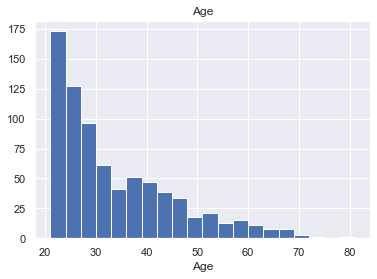

In [606]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_cols:
    num_summary(df, col, plot=True)

In [607]:
df[num_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6000,0.6270,50
1,1,85,66,29,0,26.6000,0.3510,31
2,8,183,64,0,0,23.3000,0.6720,32
3,1,89,66,23,94,28.1000,0.1670,21
4,0,137,40,35,168,43.1000,2.2880,33


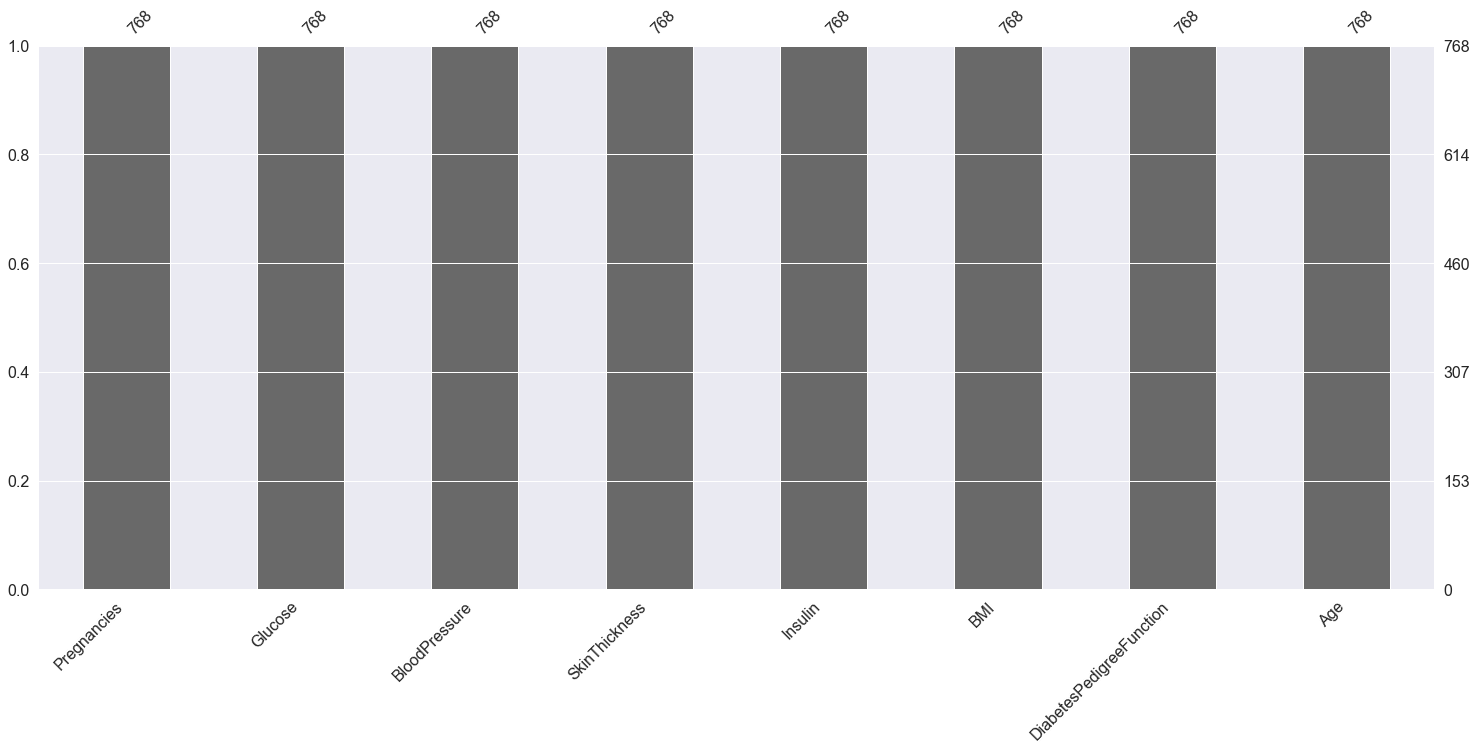

In [608]:
msno.bar(df[num_cols])
plt.show()

### Cat Columns Analysis

   Outcome   Ratio
0      500 65.1042
1      268 34.8958
##########################################


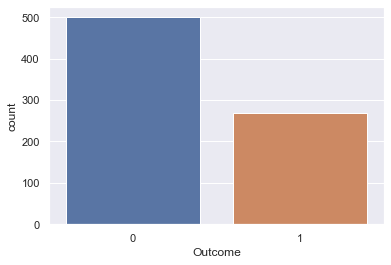

In [609]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


cat_summary(df, "Outcome",plot = True)

In [612]:
df.groupby("Outcome").agg({"Outcome":"count"})

,Outcome
Outcome,
0,500
1,268


In [613]:
for n_col in num_cols:
    print(df.groupby("Outcome").agg({n_col:"mean"}))

         Pregnancies
Outcome             
0             3.2980
1             4.8657
         Glucose
Outcome         
0       109.9800
1       141.2575
         BloodPressure
Outcome               
0              68.1840
1              70.8246
         SkinThickness
Outcome               
0              19.6640
1              22.1642
         Insulin
Outcome         
0        68.7920
1       100.3358
            BMI
Outcome        
0       30.3042
1       35.1425
         DiabetesPedigreeFunction
Outcome                          
0                          0.4297
1                          0.5505
            Age
Outcome        
0       31.1900
1       37.0672


# Outlier Values Analysis

In [614]:
def outlier_thresholds(df,col, qua1 = 0.25, qua3 = 0.75):
    q1 = df[col].quantile(qua1)
    q3 = df[col].quantile(qua3)
    
    ıqr = q3 - q1
    
    low = q1 - 1.5*ıqr
    up = q3 + 1.5*ıqr
    
    return low, up

In [615]:
def check_outlier(df, col):
    low, up = outlier_thresholds(df, col)
    
    if ((df[col] <low) | (df[col] > up)).any(axis = None):
        return True
    else:
        return False

In [616]:
def OutlierAnalysis(df, col, plot = False):
    low, up = outlier_thresholds(df,col)
    
    if check_outlier(df,col):
        print("Low: ",low,"\nUp: ",up)
        
        if plot:
            sns.boxplot(x = df[col])
            plt.show()
    print("##############################################")

In [617]:
for ncol in num_cols:
    print(ncol, check_outlier(df,ncol))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


Low:  -6.5 
Up:  13.5


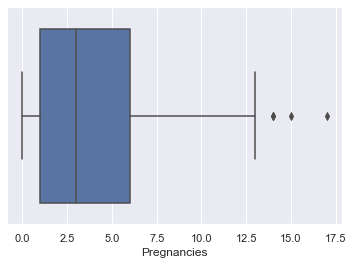

##############################################
Low:  37.125 
Up:  202.125


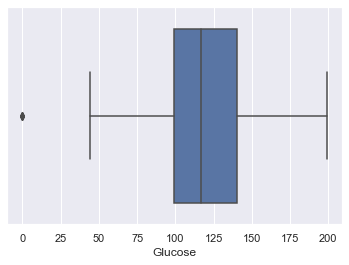

##############################################
Low:  35.0 
Up:  107.0


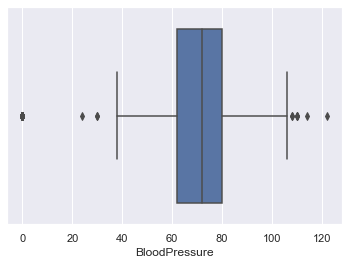

##############################################
Low:  -48.0 
Up:  80.0


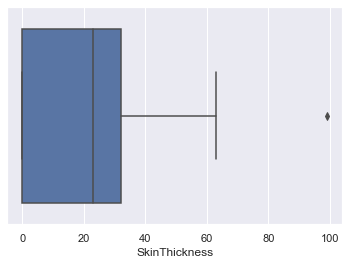

##############################################
Low:  -190.875 
Up:  318.125


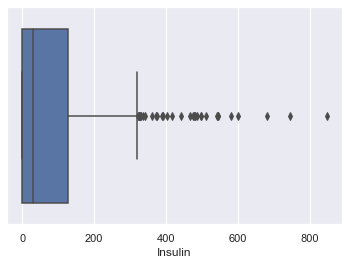

##############################################
Low:  13.35 
Up:  50.550000000000004


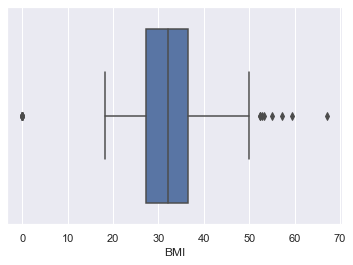

##############################################
Low:  -0.32999999999999996 
Up:  1.2


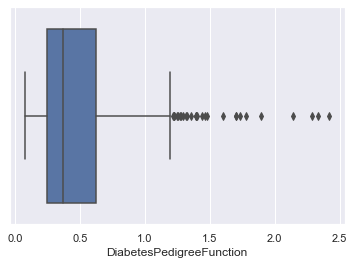

##############################################
Low:  -1.5 
Up:  66.5


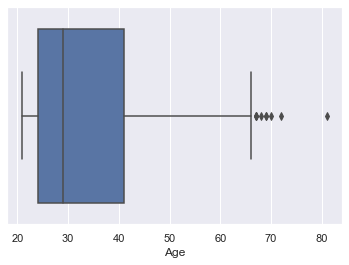

##############################################


In [618]:
for col in num_cols:
    OutlierAnalysis(df,col,plot = True)

In [619]:
def outlier_values(df, col, index = False):
    
    low, up = outlier_thresholds(df, col)
    
    if check_outlier(df,col):
        print(df[(df[col] < low) | (df[col] > up)],"\nOutlier Reasons: ",col,"\nLow: ",low,"\nUp: ",up,"\n")
        
        if index:
            return df[(df[col] < low) | (df[col] > up)].index

In [620]:
for ncol in num_cols:
    index = outlier_values(df, ncol, index = True)
    print(index)
    print("\n###########################################################################################################\n")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.1000                    0.1530   43        1
159           17      163             72             41      114 40.9000                    0.8170   47        1
298           14      100             78             25      184 36.6000                    0.4120   46        1
455           14      175             62             30        0 33.6000                    0.2120   38        1 
Outlier Reasons:  Pregnancies 
Low:  -6.5 
Up:  13.5 

Int64Index([88, 159, 298, 455], dtype='int64')

###########################################################################################################

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.7000                    0.1400   22      

# Check Na Values

In [621]:
def check_na_values(df):
    na_values = df.isnull().sum()
    nna_values = df.notnull().sum()
    print("NA VALUES\n{}\n\nNOT NA VALUES\n{}".format(na_values,nna_values))

In [622]:
check_na_values(df)

NA VALUES
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

NOT NA VALUES
Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


# Correlation Analysis

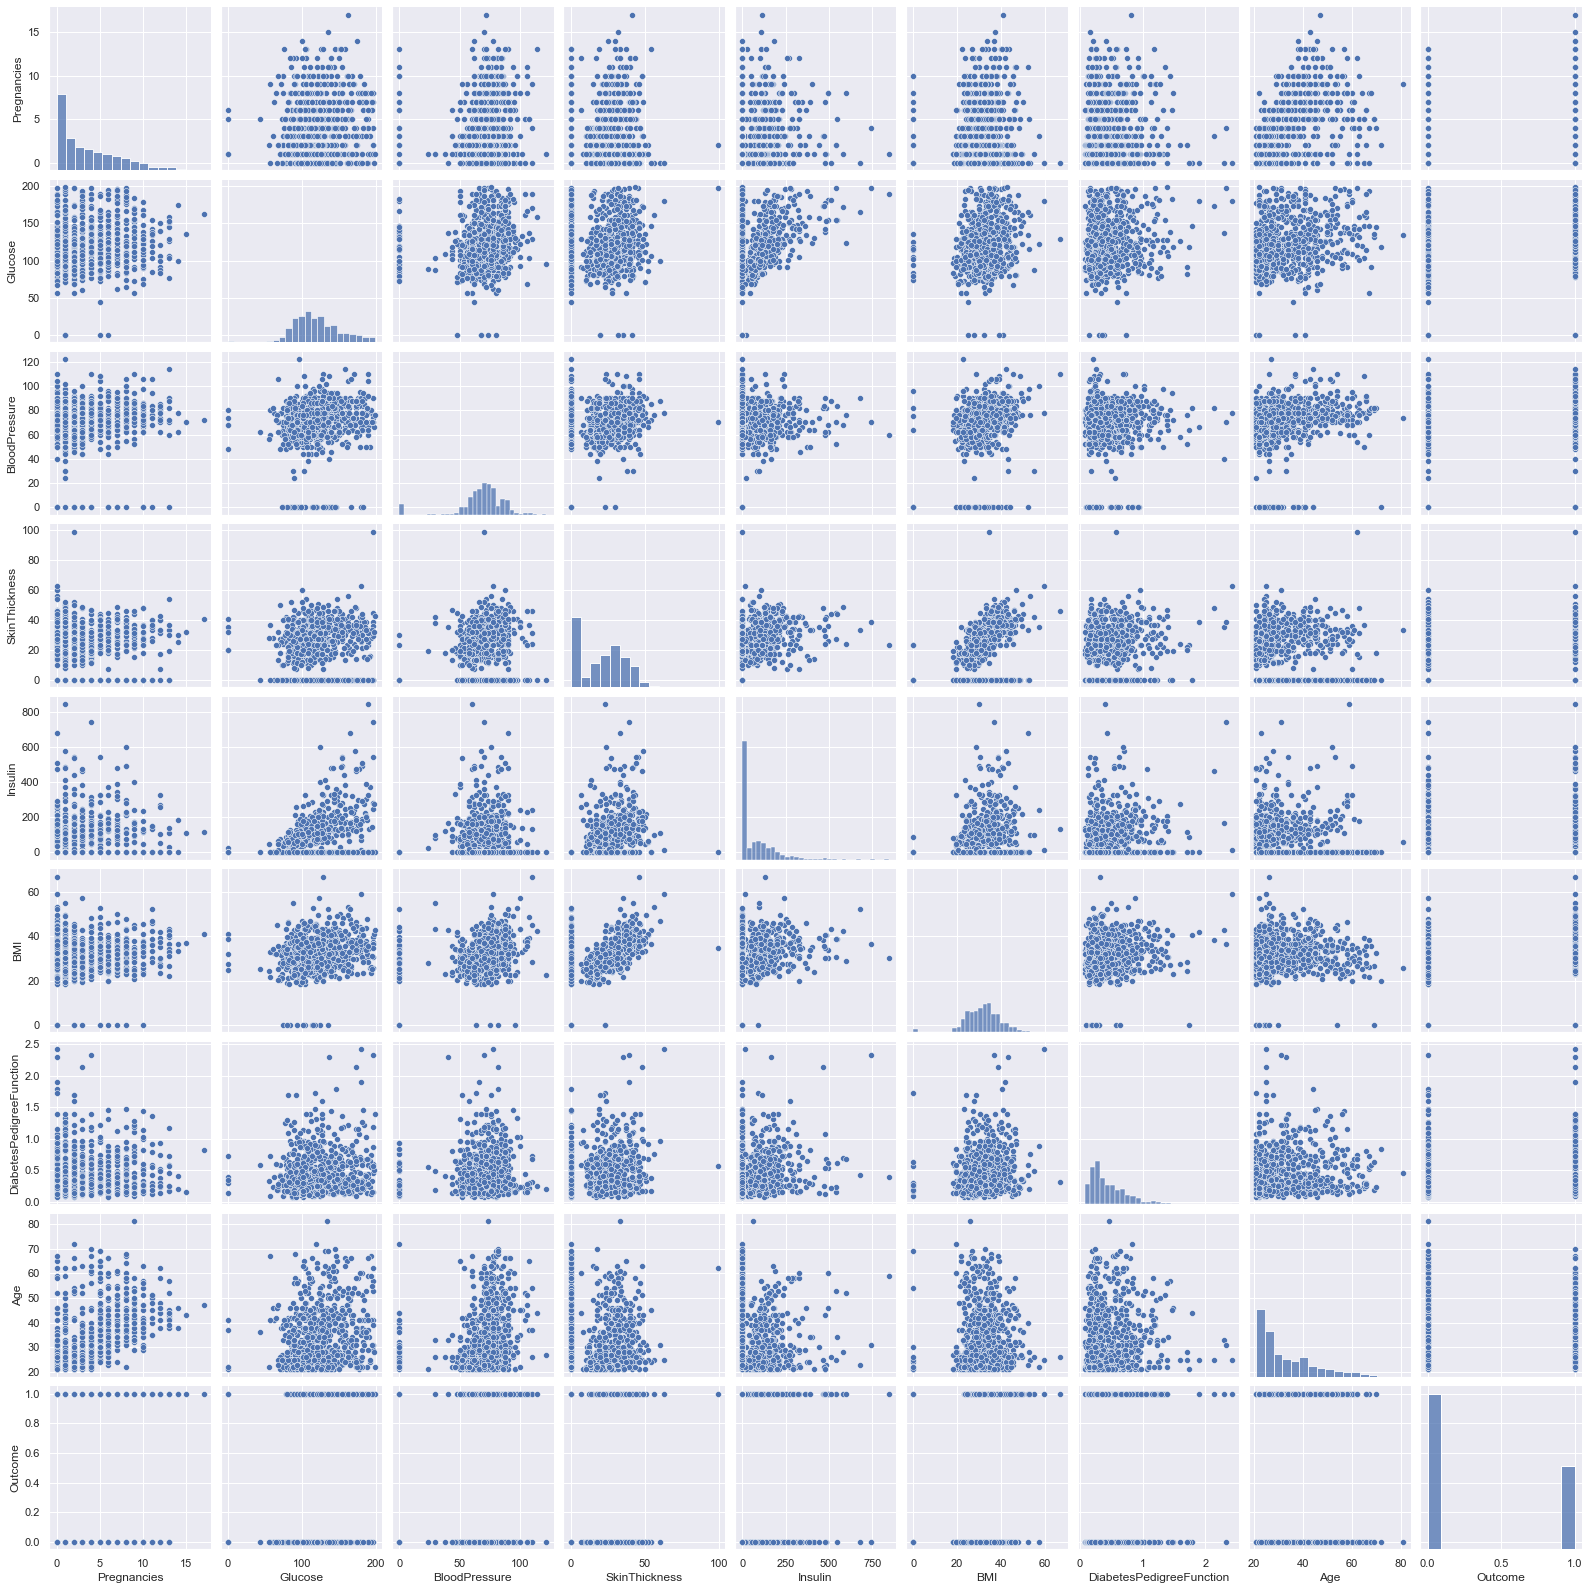

In [623]:
sns.pairplot(df)

<Figure size 1800x1800 with 0 Axes>

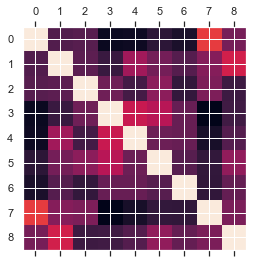

In [624]:
plt.figure(figsize = (25,25))
plt.matshow(df.corr())
plt.show()

# Replace outliers value

In [625]:
for col in num_cols:
    low, up = outlier_thresholds(df,col)
    df.loc[(df[col] < low), col] = low
    df.loc[(df[col] > up), col] = up 

In [626]:
for col in num_cols:
    print(col,"-",check_outlier(df,col))

Pregnancies - False
Glucose - False
BloodPressure - False
SkinThickness - False
Insulin - False
BMI - False
DiabetesPedigreeFunction - False
Age - False


In [627]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0000,148.0000,72,35,0.0000,33.6000,0.6270,50.0000,1
1,1.0000,85.0000,66,29,0.0000,26.6000,0.3510,31.0000,0
2,8.0000,183.0000,64,0,0.0000,23.3000,0.6720,32.0000,1
3,1.0000,89.0000,66,23,94.0000,28.1000,0.1670,21.0000,0
4,0.0000,137.0000,40,35,168.0000,43.1000,1.2000,33.0000,1
5,5.0000,116.0000,74,0,0.0000,25.6000,0.2010,30.0000,0
6,3.0000,78.0000,50,32,88.0000,31.0000,0.2480,26.0000,1
7,10.0000,115.0000,35,0,0.0000,35.3000,0.1340,29.0000,0
8,2.0000,197.0000,70,45,318.1250,30.5000,0.1580,53.0000,1
9,8.0000,125.0000,96,0,0.0000,13.3500,0.2320,54.0000,1


In [628]:
for i in range(len(df)):
    row = df.loc[i]
    for col in num_cols:
        
        if row[col] == 0:
            row[col] = None
            
    df.loc[i] = row

C:\Users\90539\AppData\Local\Temp\ipykernel_15348\2428292921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[col] = None


In [629]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0000,148.0000,72,35.0000,NaN,33.6000,0.6270,50.0000,1
1,1.0000,85.0000,66,29.0000,NaN,26.6000,0.3510,31.0000,0
2,8.0000,183.0000,64,NaN,NaN,23.3000,0.6720,32.0000,1
3,1.0000,89.0000,66,23.0000,94.0000,28.1000,0.1670,21.0000,0
4,NaN,137.0000,40,35.0000,168.0000,43.1000,1.2000,33.0000,1
5,5.0000,116.0000,74,NaN,NaN,25.6000,0.2010,30.0000,0
6,3.0000,78.0000,50,32.0000,88.0000,31.0000,0.2480,26.0000,1
7,10.0000,115.0000,35,NaN,NaN,35.3000,0.1340,29.0000,0
8,2.0000,197.0000,70,45.0000,318.1250,30.5000,0.1580,53.0000,1
9,8.0000,125.0000,96,NaN,NaN,13.3500,0.2320,54.0000,1


In [630]:
df = df.dropna()

In [631]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0000,89.0000,66,23.0000,94.0000,28.1000,0.1670,21.0000,0
6,3.0000,78.0000,50,32.0000,88.0000,31.0000,0.2480,26.0000,1
8,2.0000,197.0000,70,45.0000,318.1250,30.5000,0.1580,53.0000,1
13,1.0000,189.0000,60,23.0000,318.1250,30.1000,0.3980,59.0000,1
14,5.0000,166.0000,72,19.0000,175.0000,25.8000,0.5870,51.0000,1
18,1.0000,103.0000,35,38.0000,83.0000,43.3000,0.1830,33.0000,0
19,1.0000,115.0000,70,30.0000,96.0000,34.6000,0.5290,32.0000,1
20,3.0000,126.0000,88,41.0000,235.0000,39.3000,0.7040,27.0000,0
24,11.0000,143.0000,94,33.0000,146.0000,36.6000,0.2540,51.0000,1
25,10.0000,125.0000,70,26.0000,115.0000,31.1000,0.2050,41.0000,1


# Create New Values

In [632]:
#AGE
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "Mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "Senior"

#AGE & BMI
df.loc[(df["Age"] < 50) &(df["Age"]>= 21) & (df["BMI"] < 18.5 ),"AGE_BMI_CAT"] = "UnderweightMature"
df.loc[(df["Age"] < 50) &(df["Age"]>= 21) & (df["BMI"] >=18.5) & (df["BMI"] < 24.9),"AGE_BMI_CAT"] = "NormalMature"
df.loc[(df["Age"] < 50) &(df["Age"]>= 21) & (df["BMI"] >= 24.9) & (df["BMI"] < 29.9), "AGE_BMI_CAT"] = "OverweightMature"
df.loc[(df["Age"] < 50) &(df["Age"]>= 21) & (df["BMI"] >= 29.9), "AGE_BMI_CAT"] = "ObeseMature"

df.loc[(df["Age"] >= 50) & (df["BMI"] < 18.5 ),"AGE_BMI_CAT"] = "UnderweightSenior"
df.loc[(df["Age"] >= 50) & (df["BMI"] >=18.5) & (df["BMI"] < 24.9),"AGE_BMI_CAT"] = "NormalSenior"
df.loc[(df["Age"] >= 50) & (df["BMI"] >= 24.9) & (df["BMI"] < 29.9), "AGE_BMI_CAT"] = "OverweightSenior"
df.loc[(df["Age"] >= 50) & (df["BMI"] >= 29.9), "AGE_BMI_CAT"] = "ObeseSenior"

#BMI
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                       labels=["Underweight", "Normal", "Overweight", "Obese"])

#GLUCOSE
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])


C:\Users\90539\AppData\Local\Temp\ipykernel_15348\1424073084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "Mature"
C:\Users\90539\AppData\Local\Temp\ipykernel_15348\1424073084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["Age"] < 50) &(df["Age"]>= 21) & (df["BMI"] < 18.5 ),"AGE_BMI_CAT"] = "UnderweightMature"
C:\Users\90539\AppData\Local\Temp\ipykernel_15348\1424073084.py:17: SettingWithCopyWarning: 
A value is trying to 

In [633]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,AGE_BMI_CAT,NEW_BMI,NEW_GLUCOSE
3,1.0000,89.0000,66,23.0000,94.0000,28.1000,0.1670,21.0000,0,Mature,OverweightMature,Overweight,Normal
6,3.0000,78.0000,50,32.0000,88.0000,31.0000,0.2480,26.0000,1,Mature,ObeseMature,Obese,Normal
8,2.0000,197.0000,70,45.0000,318.1250,30.5000,0.1580,53.0000,1,Senior,ObeseSenior,Obese,Prediabetes
13,1.0000,189.0000,60,23.0000,318.1250,30.1000,0.3980,59.0000,1,Senior,ObeseSenior,Obese,Prediabetes
14,5.0000,166.0000,72,19.0000,175.0000,25.8000,0.5870,51.0000,1,Senior,OverweightSenior,Overweight,Prediabetes
18,1.0000,103.0000,35,38.0000,83.0000,43.3000,0.1830,33.0000,0,Mature,ObeseMature,Obese,Normal
19,1.0000,115.0000,70,30.0000,96.0000,34.6000,0.5290,32.0000,1,Mature,ObeseMature,Obese,Normal
20,3.0000,126.0000,88,41.0000,235.0000,39.3000,0.7040,27.0000,0,Mature,ObeseMature,Obese,Normal
24,11.0000,143.0000,94,33.0000,146.0000,36.6000,0.2540,51.0000,1,Senior,ObeseSenior,Obese,Prediabetes
25,10.0000,125.0000,70,26.0000,115.0000,31.1000,0.2050,41.0000,1,Mature,ObeseMature,Obese,Normal


In [634]:
#Upper columns names
df.columns = [col.upper() for col in df.columns]

In [635]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,AGE_BMI_CAT,NEW_BMI,NEW_GLUCOSE
3,1.0000,89.0000,66,23.0000,94.0000,28.1000,0.1670,21.0000,0,Mature,OverweightMature,Overweight,Normal
6,3.0000,78.0000,50,32.0000,88.0000,31.0000,0.2480,26.0000,1,Mature,ObeseMature,Obese,Normal
8,2.0000,197.0000,70,45.0000,318.1250,30.5000,0.1580,53.0000,1,Senior,ObeseSenior,Obese,Prediabetes
13,1.0000,189.0000,60,23.0000,318.1250,30.1000,0.3980,59.0000,1,Senior,ObeseSenior,Obese,Prediabetes
14,5.0000,166.0000,72,19.0000,175.0000,25.8000,0.5870,51.0000,1,Senior,OverweightSenior,Overweight,Prediabetes


In [636]:
cat_cols, num_cols, cat_but_car = grab_columns(df)

In [637]:
cat_cols =[col for col in cat_cols if col != "OUTCOME"]
cat_cols

['NEW_AGE_CAT', 'AGE_BMI_CAT', 'NEW_BMI', 'NEW_GLUCOSE']

In [638]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [639]:
cat_but_car

[]

# Encoding

In [640]:
df = pd.get_dummies(df, columns= cat_cols,drop_first = True)

In [641]:
df.index = range(len(df))
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT_Senior,AGE_BMI_CAT_NormalSenior,AGE_BMI_CAT_ObeseMature,AGE_BMI_CAT_ObeseSenior,AGE_BMI_CAT_OverweightMature,AGE_BMI_CAT_OverweightSenior,AGE_BMI_CAT_UnderweightMature,NEW_BMI_Normal,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,1.0000,89.0000,66,23.0000,94.0000,28.1000,0.1670,21.0000,0,0,0,0,0,1,0,0,0,1,0,0,0
1,3.0000,78.0000,50,32.0000,88.0000,31.0000,0.2480,26.0000,1,0,0,1,0,0,0,0,0,0,1,0,0
2,2.0000,197.0000,70,45.0000,318.1250,30.5000,0.1580,53.0000,1,1,0,0,1,0,0,0,0,0,1,1,0
3,1.0000,189.0000,60,23.0000,318.1250,30.1000,0.3980,59.0000,1,1,0,0,1,0,0,0,0,0,1,1,0
4,5.0000,166.0000,72,19.0000,175.0000,25.8000,0.5870,51.0000,1,1,0,0,0,0,1,0,0,1,0,1,0


# Scaling

In [642]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [643]:
df

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT_Senior,AGE_BMI_CAT_NormalSenior,AGE_BMI_CAT_ObeseMature,AGE_BMI_CAT_ObeseSenior,AGE_BMI_CAT_OverweightMature,AGE_BMI_CAT_OverweightSenior,AGE_BMI_CAT_UnderweightMature,NEW_BMI_Normal,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,-0.9161,-1.0640,-0.3561,-0.5511,-0.5826,-0.6648,-1.1815,-1.0479,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-0.2679,-1.4184,-1.6784,0.3286,-0.6538,-0.2003,-0.8993,-0.5610,1,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.5920,2.4153,-0.0255,1.5994,2.0786,-0.2804,-1.2129,2.0681,1,1,0,0,1,0,0,0,0,0,1,1,0
3,-0.9161,2.1576,-0.8520,-0.5511,2.0786,-0.3445,-0.3766,2.6524,1,1,0,0,1,0,0,0,0,0,1,1,0
4,0.3804,1.4166,0.1398,-0.9421,0.3792,-1.0333,0.2820,1.8734,1,1,0,0,0,0,1,0,0,1,0,1,0
5,-0.9161,-0.6130,-2.9181,0.9151,-0.7132,1.7700,-1.1258,0.1206,0,0,0,1,0,0,0,0,0,0,1,0,0
6,-0.9161,-0.2264,-0.0255,0.1331,-0.5588,0.3764,0.0799,0.0233,1,0,0,1,0,0,0,0,0,0,1,0,0
7,-0.2679,0.1280,1.4621,1.2084,1.0916,1.1292,0.6897,-0.4636,0,0,0,1,0,0,0,0,0,0,1,0,0
8,2.3252,0.6757,1.9580,0.4264,0.0349,0.6967,-0.8784,1.8734,1,1,0,0,1,0,0,0,0,0,1,1,0
9,2.0011,0.0958,-0.0255,-0.2579,-0.3332,-0.1843,-1.0491,0.8996,1,0,0,1,0,0,0,0,0,0,1,0,0


# Model 

In [644]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [645]:

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 3)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")

Accuracy: 0.75
Recall: 0.6
Precision: 0.48
F1: 0.54
Auc: 0.7
